In [56]:
from sklearn import datasets

import numpy as np

iris = datasets.load_iris()

X = iris.data[: , [2 , 3]]

y = iris.target

print('The count of classlabel : ', np.unique(y))

The count of classlabel :  [0 1 2]


In [57]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(
    X , y ,train_size=0.7 , random_state=1 , stratify=y
)

In [58]:
print(np.bincount(y_train))

print(np.bincount(y_test))

[35 35 35]
[15 15 15]


In [59]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)

X_test_std = sc.transform(X_test)

In [60]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='Test set') 

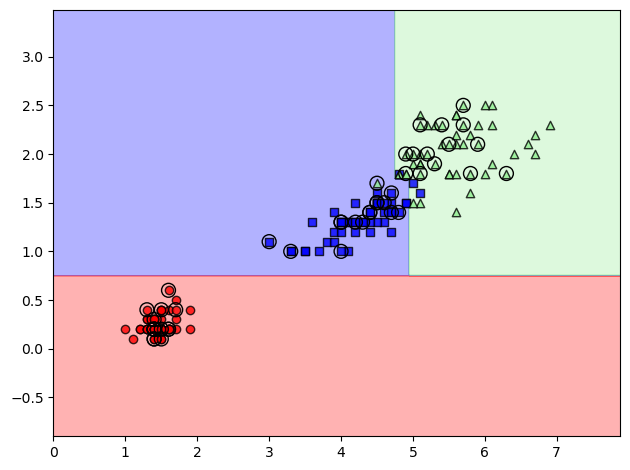

In [61]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(
    criterion='gini' , max_depth=4 , random_state=1
)

tree_model.fit(X_train , y_train)

X_combined = np.vstack((X_train , X_test))

y_combined = np.hstack((y_train , y_test))

plot_decision_regions(
    X_combined , y_combined , classifier=tree_model , test_idx=range(105 , 150)
)

plt.tight_layout()

plt.show()

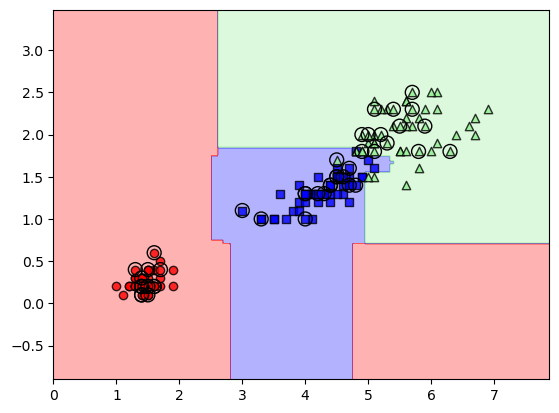

In [62]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy' , n_estimators=25 , n_jobs=2
)

forest.fit(X_train , y_train)

plot_decision_regions(
    X_combined , y_combined,

    classifier=forest ,test_idx=range(105,150)
)
